## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import simplefilter
simplefilter('ignore')

## Exploratory Data Analysis

### Data Loading and Exploration

In [2]:
raw_data = pd.read_csv('customer_segmentation_data.csv')
data = raw_data.copy()
data.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [3]:
data.shape

(3834, 4)

In [4]:
data.dtypes

minutes_watched    float64
CLV                float64
region               int64
channel              int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
minutes_watched,3725.0,1972.094497,7401.693028,0.0,159.00,512.0,1521.00,288508.0
CLV,3834.0,118.383920,70.471274,0.0,62.58,119.0,149.99,626.4
region,3834.0,1.167188,0.923055,0.0,0.00,2.0,2.00,2.0
channel,3834.0,3.870370,2.191972,1.0,2.00,3.0,6.00,8.0


In [7]:
data.duplicated().sum()

43

In [8]:
data.isnull().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

- the minutes watched column have null values correspond to people who've entered the program, but have not seen any content.

### Data Cleaning and Preprocessing

In [9]:
data.minutes_watched = data.minutes_watched.fillna(0.0)
data.isnull().sum()

minutes_watched    0
CLV                0
region             0
channel            0
dtype: int64

In [10]:
data = data.drop_duplicates()
data[data.duplicated()]

,minutes_watched,CLV,region,channel


### Feature Engineering

In [11]:
data.corr()['channel'].sort_values(ascending = False)

channel            1.000000
region             0.012942
minutes_watched   -0.004396
CLV               -0.026897
Name: channel, dtype: float64

In [12]:
data_with_dummies = pd.get_dummies(data = data, columns = ['region', 'channel'], drop_first = False)
data_with_dummies['region'] = data.region
data_with_dummies.head()

,minutes_watched,CLV,region_0,region_1,region_2,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,region
0,3197.0,205.42,0,0,1,0,0,0,1,0,0,0,0,2
1,63.0,149.99,1,0,0,1,0,0,0,0,0,0,0,0
2,605.0,119.00,0,0,1,0,1,0,0,0,0,0,0,2
3,20.0,240.00,0,0,1,0,0,0,1,0,0,0,0,2
4,245.0,184.36,0,1,0,0,0,0,1,0,0,0,0,1


In [13]:
data_with_dummies = data_with_dummies.rename(columns = {'channel_1':'Google', 'channel_2':'Facebook', 'channel_3':'YouTube','channel_4':'LinkedIn', 
                                                    'channel_5':'Twitter', 'channel_6':'Instagram', 'channel_7':'Friend', 'channel_8':'Other'})

In [14]:
data_with_dummies.head()

,minutes_watched,CLV,region_0,region_1,region_2,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,region
0,3197.0,205.42,0,0,1,0,0,0,1,0,0,0,0,2
1,63.0,149.99,1,0,0,1,0,0,0,0,0,0,0,0
2,605.0,119.00,0,0,1,0,1,0,0,0,0,0,0,2
3,20.0,240.00,0,0,1,0,0,0,1,0,0,0,0,2
4,245.0,184.36,0,1,0,0,0,0,1,0,0,0,0,1


### Data Visualization and Correlation Analysis

In [15]:
import plotly.express as px
px.imshow(data.corr(), title = 'correlation plot of a customer segmentaion')

In [16]:
fig = px.histogram(data, x = 'channel', color = 'region', hover_data = data.columns,
                   title = 'distribution of a channel with respect to region',
                   barmode = 'group')
fig.show()

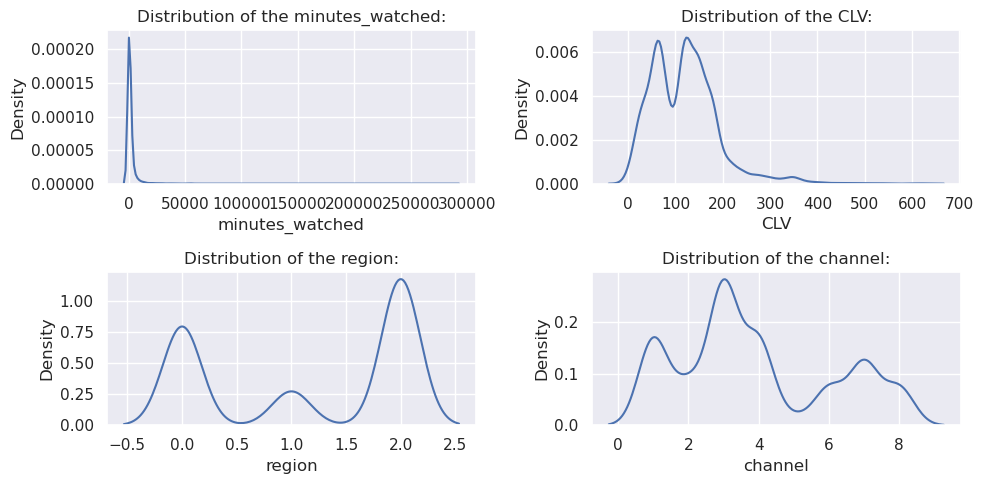

In [17]:
plt.figure(figsize = (10, 5))
for i, col in enumerate(data.columns, 1):
    plt.subplot(2, 2, i)
    plt.title(f'Distribution of the {col}:')
    sns.kdeplot(data[col])
    plt.tight_layout()
    plt.plot()

In [18]:
fig = px.box(data, y = 'minutes_watched')
fig.show()

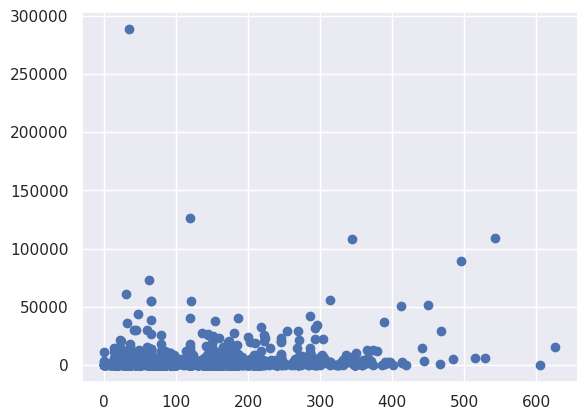

In [19]:
plt.scatter(data.CLV, data.minutes_watched)
plt.show()

## Model Implementation

### standardization

In [20]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data_scaled = scale.fit_transform(data_with_dummies)
data_scaled

array([[ 0.17117712,  1.22679275, -0.74073657, ..., -0.37881992,
        -0.28643827,  0.90059802],
       [-0.25543582,  0.44358121,  1.3500076 , ..., -0.37881992,
        -0.28643827, -1.26920689],
       [-0.18165656,  0.00570054, -0.74073657, ..., -0.37881992,
        -0.28643827,  0.90059802],
       ...,
       [-0.26020017, -0.5594891 ,  1.3500076 , ..., -0.37881992,
        -0.28643827, -1.26920689],
       [-0.25625257, -1.16706796, -0.74073657, ..., -0.37881992,
        -0.28643827,  0.90059802],
       [-0.25802218, -1.16706796, -0.74073657, ..., -0.37881992,
        -0.28643827,  0.90059802]])

### hierarchical clustering algorithm

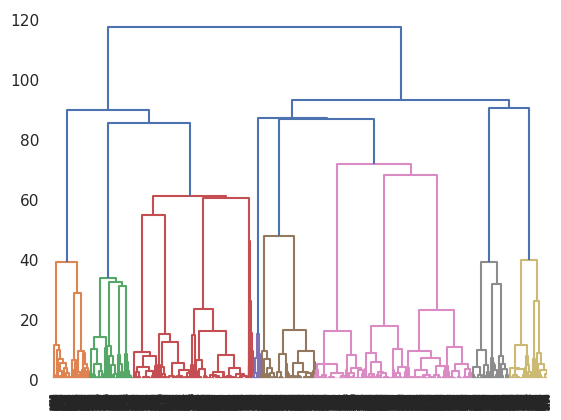

<Figure size 1200x900 with 0 Axes>

In [21]:
# using dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))
plt.figure(figsize = (12, 9))
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean',
                             linkage = 'ward')
y_cluster_hc = hc.fit_predict(data_scaled)

### K-Means

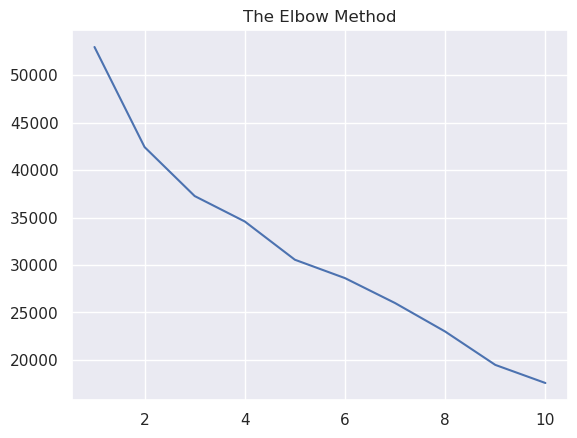

In [23]:
from sklearn.cluster import KMeans

# the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    random_state = 0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
# plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 0)
y_cluster_km = kmeans.fit_predict(data_scaled)

## Model Interpretation and Results

In [25]:
data_copy = data_with_dummies.copy()

#  Assigning the cluster labels generated by k-means to a new column named 'Segment' in the copied dataframe.
data_copy['segment'] = kmeans.labels_

In [26]:
pd.set_option('display.max_columns', 500)

In [27]:
# Grouping the dataframe by the 'Segment' column and calculating the mean for each segment.
# This provides a profile for each cluster based on the mean values of the original features.
data_analysis = data_copy.groupby(['segment']).mean()
data_analysis

,minutes_watched,CLV,region_0,region_1,region_2,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,region
segment,,,,,,,,,,,,,,
0,1785.323789,100.586564,0.000000,0.154185,0.845815,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,1.845815
1,1570.001934,136.865745,1.000000,0.000000,0.000000,0.249516,0.0,0.428433,0.179884,0.0,0.0,0.0,0.142166,0.000000
2,2481.842022,120.046840,0.000000,0.200632,0.799368,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.799368
3,2822.996667,108.226967,0.286667,0.103333,0.610000,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.323333
4,2015.421053,113.945621,0.258947,0.113684,0.627368,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,1.368421
5,1321.820423,115.093415,0.309859,0.190141,0.500000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,1.190141
6,2009.658135,111.574516,0.000000,0.221207,0.778793,0.744059,0.0,0.000000,0.000000,0.0,0.0,0.0,0.255941,1.778793
7,985.327586,93.151552,0.172414,0.051724,0.775862,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,1.603448


In [28]:
# Counting the number of observations in each segment.
data_analysis['num_observations'] = data_copy[['segment', 'region_0']].groupby(['segment']).count()

# Calculating the proportion of observations in each segment.
data_analysis['prop'] = data_analysis['num_observations'] / data_analysis['num_observations'].sum()
data_analysis.round(2)

,minutes_watched,CLV,region_0,region_1,region_2,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,region,num_observations,prop
segment,,,,,,,,,,,,,,,,
0,1785.32,100.59,0.00,0.15,0.85,0.00,0.0,0.00,1.00,0.0,0.0,0.0,0.00,1.85,454,0.12
1,1570.00,136.87,1.00,0.00,0.00,0.25,0.0,0.43,0.18,0.0,0.0,0.0,0.14,0.00,1034,0.27
2,2481.84,120.05,0.00,0.20,0.80,0.00,0.0,1.00,0.00,0.0,0.0,0.0,0.00,1.80,633,0.17
3,2823.00,108.23,0.29,0.10,0.61,0.00,1.0,0.00,0.00,0.0,0.0,0.0,0.00,1.32,300,0.08
4,2015.42,113.95,0.26,0.11,0.63,0.00,0.0,0.00,0.00,0.0,0.0,1.0,0.00,1.37,475,0.13
5,1321.82,115.09,0.31,0.19,0.50,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.00,1.19,284,0.08
6,2009.66,111.57,0.00,0.22,0.78,0.74,0.0,0.00,0.00,0.0,0.0,0.0,0.26,1.78,547,0.14
7,985.33,93.15,0.17,0.05,0.78,0.00,0.0,0.00,0.00,1.0,0.0,0.0,0.00,1.60,58,0.02


In [29]:
# Renaming the index labels (which are segment numbers) with more descriptive names.
# This provides a more interpretable profile for each cluster.
data_analysis.rename(
    {
        0:'LinkedIn Networkers',
        1:'Anglo-Saxon Multi-Channel',
        2:'YouTube Networkers',
        3:'Facebook Followers',
        4:'Friends',
        5:'Instagram Explorers',
        6:'Google-Other Mix',
        7:'Twitter Devotees',
    }
)

,minutes_watched,CLV,region_0,region_1,region_2,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,region,num_observations,prop
segment,,,,,,,,,,,,,,,,
LinkedIn Networkers,1785.323789,100.586564,0.000000,0.154185,0.845815,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,1.845815,454,0.119947
Anglo-Saxon Multi-Channel,1570.001934,136.865745,1.000000,0.000000,0.000000,0.249516,0.0,0.428433,0.179884,0.0,0.0,0.0,0.142166,0.000000,1034,0.273184
YouTube Networkers,2481.842022,120.046840,0.000000,0.200632,0.799368,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.799368,633,0.167239
Facebook Followers,2822.996667,108.226967,0.286667,0.103333,0.610000,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.323333,300,0.079260
Friends,2015.421053,113.945621,0.258947,0.113684,0.627368,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,1.368421,475,0.125495
Instagram Explorers,1321.820423,115.093415,0.309859,0.190141,0.500000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,1.190141,284,0.075033
Google-Other Mix,2009.658135,111.574516,0.000000,0.221207,0.778793,0.744059,0.0,0.000000,0.000000,0.0,0.0,0.0,0.255941,1.778793,547,0.144518
Twitter Devotees,985.327586,93.151552,0.172414,0.051724,0.775862,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,1.603448,58,0.015324


In [30]:
# Mapping the cluster numbers (Segment) to more human-readable labels using a dictionary.
# This helps in interpreting the clusters in plots and other visualizations.
data_copy['Labels'] = data_copy['segment'].map({
    0:'LinkedIn Networkers',
    1:'Anglo-Saxon Multi-Channel',
    2:'YouTube Networkers',
    3:'Facebook Followers',
    4:'Friends',
    5:'Instagram Explorers',
    6:'Google-Other Mix',
    7:'Twitter Devotees', 
})

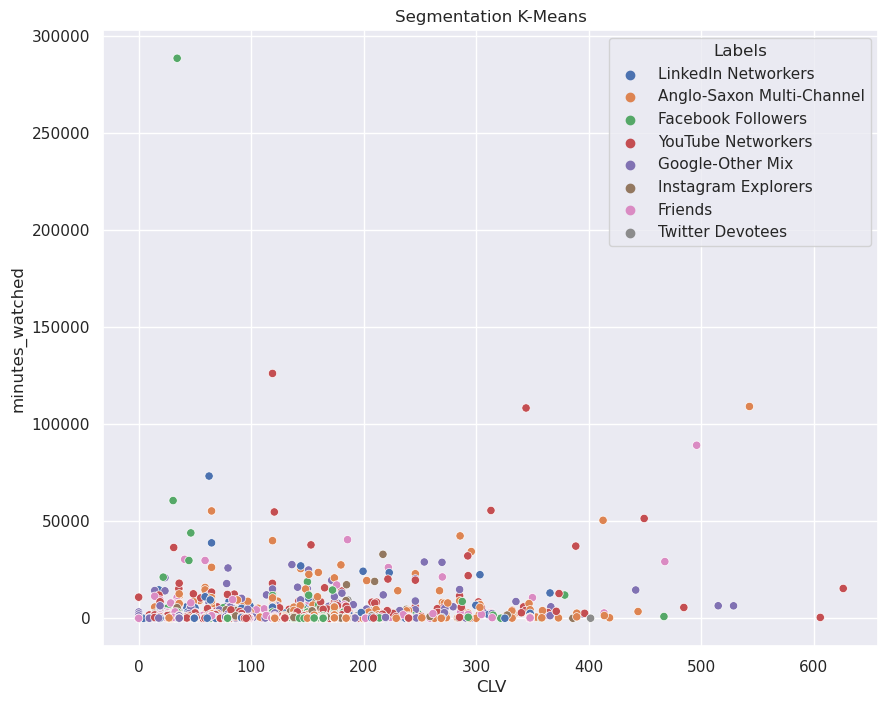

In [31]:
# Creating a scatter plot using seaborn.
# The 'hue' parameter colors the points based on the 'Labels' column, allowing for distinction between clusters.
plt.figure(figsize = (10, 8))
sns.scatterplot(x = data_copy.CLV, y = data_copy.minutes_watched, hue = data_copy.Labels)
plt.title('Segmentation K-Means')
plt.show()

### Conclusion

#### Based on that information, we can formulate the following clusters.

1. **Segment 0** – *LinkedIn Networkers* (454 Observations): This segment consists entirely of customers from the rest of the world and Western Europe who have heard about your platform via LinkedIn. They have a high level of engagement but slightly moderate spending.

2. **Segment 1** – *Anglo-Saxon Multi-Channel* (1034 Observations): This segment includes customers from the US, Canada, The UK, and Australia who discovered the platform through a mix of Google, YouTube, and LinkedIn. They have high engagement and moderate spending.

3. **Segment 2** – *YouTube Networkers* (633 Observations): These customers from the rest of the world and Western Europe discovered the platform via a YouTube. They have very high engagement and moderate spending.

4. **Segment 3** – *Facebook Followers* (300 Observations): This group mainly heard about the platform from Facebook. They are from all regions but predominantly from the rest of the world. They have the highest level of engagement and moderate spending.

5. **Segment 4** – *Friends' Influence* (475 Observations): This group mainly heard about the platform from Friends, They are from all regions. They have high engagement and moderate spending.

6. **Segment 5** – *Instagram Explorers* (284 Observations): These customers are from all regions, with a slightly larger group from the rest of the world. They discovered the platform through Instagram and have a relatively moderate level of engagement and expenditure.

7. **Segment 6** – *Google-Other Mix* (547 Observations): These customers are from all regions, with a slightly larger group from the rest of the world. They discovered the platform through Google and others and have a relatively high level of engagement and moderate spending.

8. **Segment 7** – *Twitter Devotees* (58 Observations): This small group of customers discovered the platform via Twitter. They’re from all regions, with a majority from the rest of the world. They have the lowest engagement but moderate spending.


- Thank You